# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - n \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum{i=1}^N y_i = 0 \\
& n \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{n} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{n} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{n} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x} - \hat{\beta}_1 x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
# huh, live and learn
type(boston)

sklearn.utils.Bunch

In [4]:
print(dir(boston))

['DESCR', 'data', 'feature_names', 'target']


In [5]:
type(boston.target)

numpy.ndarray

In [6]:
type(boston.DESCR)

str

In [7]:
boston.target.shape

(506,)

In [8]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [9]:
boston.data.shape

(506, 13)

In [10]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [11]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [12]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [13]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [14]:
print(boston.target.shape)

(506,)


In [15]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [16]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

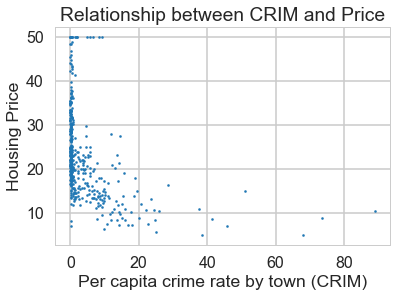

In [17]:
plt.scatter(bos.CRIM, bos.PRICE, s=4)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

##### your turn: describe relationship
The data seems to imply that if the crime rate is high, the price will be low (negative correlation).
On the other hand, there are many examples where crime is low, but housing price can be any value.

The line across the top left of the plot with housing price ~=50 is odd in that the top 2/3s of the 
plot is empty (in contrast to near vertical axis showing homes at all prices when crime is very low).

If you look at the next chart below (price, rm), there are also a group of values floating 
at the the top of the range with no neighbors.  To me this implies the data are clipped with
some maximum value replacing an actual value.

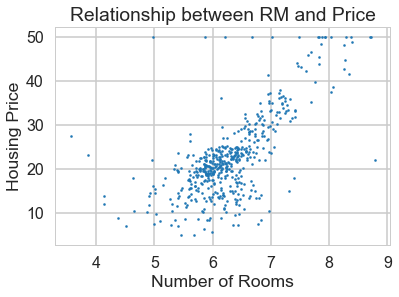

In [18]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE, s=4)
plt.xlabel("Number of Rooms")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

### Number of rooms and price

These data seem to show that generally speaking, the larger the number of rooms, the higher the price i.e. a strong positive correlation.

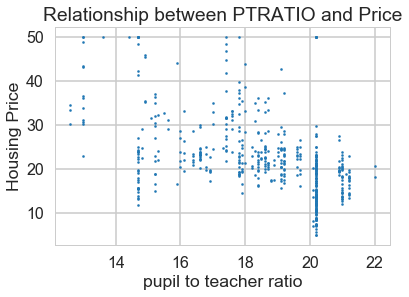

In [19]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE, s=4)
plt.xlabel("pupil to teacher ratio")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

#### Pupil to Teacher ratio and Price

This story is less clear.  There seems to be some evidence that a higher P/T ratio means a lower house price can be expected, but the relationship doesn't seem to be terribly strong.  It's quite evident that for almost any P/T ratio, there is a wide range of housing prices.  

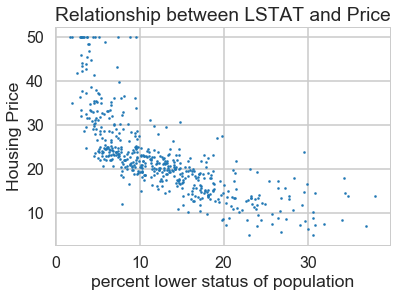

In [20]:
# your turn: create some other scatter plots
# LSTAT:  % lower status of the population
# shows strong negative correlation
plt.scatter(bos.LSTAT, bos.PRICE, s=4)
plt.xlabel("percent lower status of population")
plt.ylabel("Housing Price")
plt.title("Relationship between LSTAT and Price")

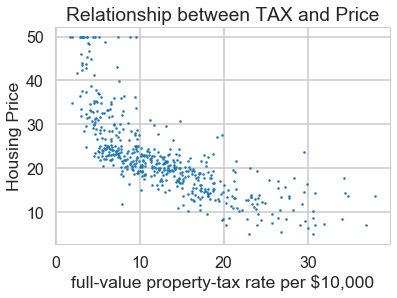

In [21]:
# your turn: create some other scatter plots
# TAX: full-value property-tax rate per $10,000
# again shows negative correlation
plt.scatter(bos.LSTAT, bos.PRICE, s=4)
plt.xlabel("full-value property-tax rate per $10,000")
plt.ylabel("Housing Price")
plt.title("Relationship between TAX and Price")

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

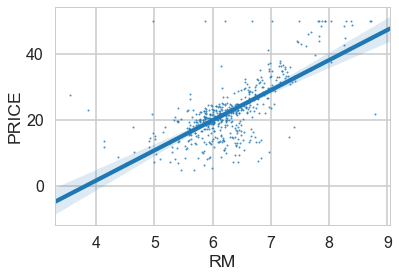

In [22]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True, scatter_kws={"s": 4})

### Histograms
***


In [23]:
# before answering the questions below, I want to know something about what I'm plotting.
# there are 506 values, between 0.01 and 89.0
# hmmm... that's funny - median is 0.25, mean is 3.6.  I wonder how much of that is due to one value

bos.CRIM.describe()

count    506.000000
mean       3.593761
std        8.596783
min        0.006320
25%        0.082045
50%        0.256510
75%        3.647423
max       88.976200
Name: CRIM, dtype: float64

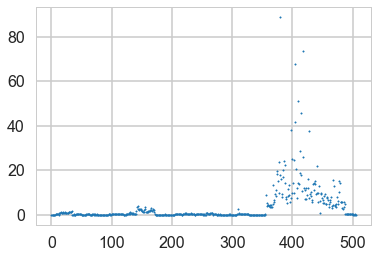

In [24]:
### Interesting.  70% of data is very low crime; 30% has a good deal
### of variation
plt.scatter(np.arange(len(bos.CRIM)), bos.CRIM, s=2)

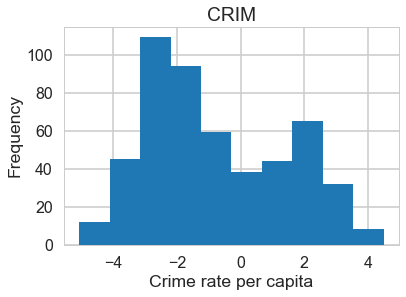

In [25]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

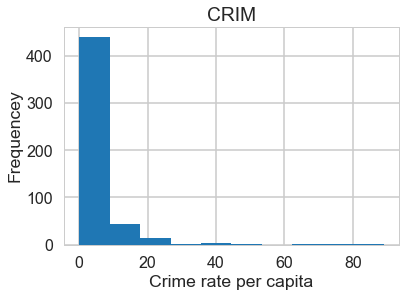

In [26]:
# Part 2 Checkup Exercise Set II answer

# taking the log of CRIM compresses the range of values (logarithmically).  So min of CRIM turns into -4, max turns into 
# +4.  So each histogram bin represents a count items with the same order of magnitude.
# The 2nd plot makes it very clear that the bulk of samples have a crime rate that is quite small.

plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()


#### Exercise: 
Plot the histogram for RM and PTRATIO against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.


#####   My Comments:
#####  This doesn't parse.  Histograms aren't plotted 'against' anything.    A histogram is a visual representation of counts of one variable that  fall into a number of bins (a parameter of the histogram).  Also,  there are automated methods for establishing correlations between variables.



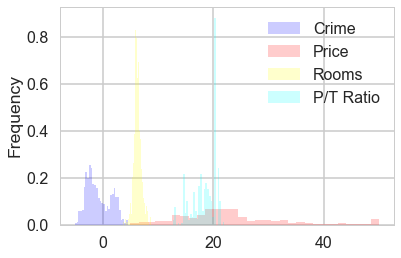

In [27]:
# is this what is meant by the question?
# if so, it would be better stated as plot histograms on the same axis
plt.hist(np.log(bos.CRIM), bins = 30, normed=True, color='blue', label='Crime', alpha=0.2)
plt.title("")
plt.xlabel("")
plt.ylabel("Frequency")

plt.hist(bos.PRICE, bins=30, normed=True, color='red', label='Price', alpha=0.2)
plt.hist(bos.RM, bins=30, normed=True, color='yellow', label='Rooms', alpha=0.2)
plt.hist(bos.PTRATIO, bins=30, normed=True, color='cyan', label='P/T Ratio', alpha=0.2)
plt.legend()
plt.show()


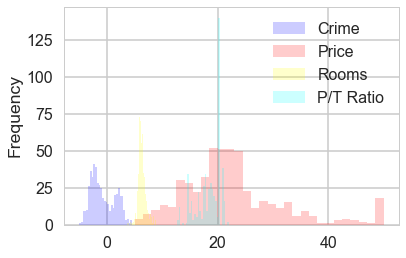

In [28]:
# without norming
plt.hist(np.log(bos.CRIM), bins = 30, normed=False, color='blue', label='Crime', alpha=0.2)
plt.title("")
plt.xlabel("")
plt.ylabel("Frequency")

plt.hist(bos.PRICE, bins=30, normed=False, color='red', label='Price', alpha=0.2)
plt.hist(bos.RM, bins=30, normed=False, color='yellow', label='Rooms', alpha=0.2)
plt.hist(bos.PTRATIO, bins=30, normed=False, color='cyan', label='P/T Ratio', alpha=0.2)
plt.legend()
plt.show()


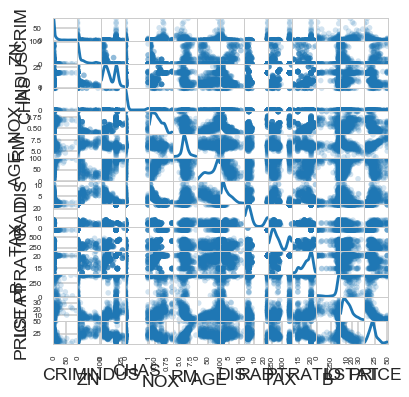

In [29]:
### At the suggestion of AJ Sanchez, here is a scatter plot matrix
### it shows a scatter plot of each variable plotted against all the others
from pandas.plotting import scatter_matrix
scatter_matrix(bos, alpha=0.2, figsize=(6, 6), diagonal='kde');
### not a very clear plot, but the last row is the important one because
### it shows PRICE vs all the other variables

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [30]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\Users\saus\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [31]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 01 Dec 2017   Prob (F-statistic):           2.49e-74
Time:                        22:53:50   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output.  But we'll concentrate on the coefficient table (middle table).  We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero.  This means that the number of rooms, `RM`, is a statistically significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>
<p><b> MS answer:  If the prediction were perfect, every point would be on the line y=x.  I included this line in the plot for reference.  
One thing that leaps out is there is one prediction that is negative for a house with actual price around 28k.  If I were serious about this I'd want to count the ones above and below y=x.  Okay, it's evenly split above and below.
</b></p>
<p><b> Also, the ceiling (at \$50k, along the right of the plot) is in the data, not the model.  To me this says that there is some important feature that is not included in the variables.  </b></p>
<p><b>Further, the higher priced housing is under-predicted as mentioned above but the lower price housing is over-predicted. The middle of the range has the best fit.  There is one negative prediction.

</b></p>

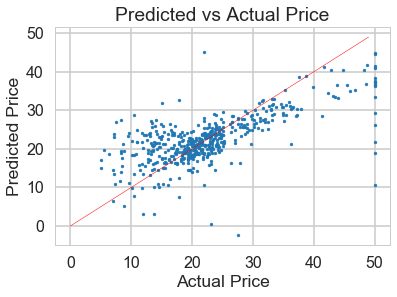

In [32]:
# MS answer
plt.clf()
plt.scatter(x=bos.PRICE, y=m.fittedvalues, s=8)
x = np.arange(50); y = x.copy()
plt.plot(x, y, color='red', linewidth=0.5)
plt.title('Predicted vs Actual Price')
plt.xlabel('Actual Price' )
plt.ylabel('Predicted Price')
plt.show()

In [33]:
### MS exploration
# get the number above and below y = x
numTooHigh = (m.fittedvalues > bos.PRICE).sum()
numTooLow = (m.fittedvalues > bos.PRICE).sum(); (numTooHigh, numTooLow)

(249, 249)

In [34]:
### MS exploration
# let's look at the correlation matrix
bosCorr = bos.corr(); bosCorr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [35]:
### MS exploration continued...
### okay, now that I've done that, I can see that the strongest correlation to price is LSTAT and it's negative.
### for now, I'll add that into the model and see what happens
mod = ols('PRICE ~ RM + LSTAT', bos).fit()

print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Fri, 01 Dec 2017   Prob (F-statistic):          7.01e-112
Time:                        22:53:51   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.6

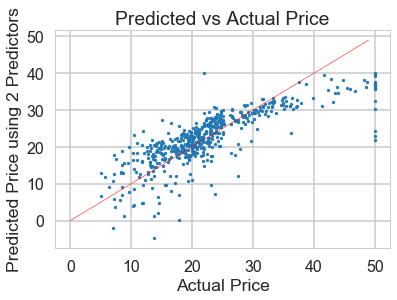

In [36]:
### More exploration
# plot the model and actual
plt.clf()
plt.scatter(x=bos.PRICE, y=mod.fittedvalues, s=8)
x = np.arange(50); y = x.copy()
plt.plot(x, y, color='red', linewidth=0.5)
plt.title('Predicted vs Actual Price')
plt.xlabel('Actual Price' )
plt.ylabel('Predicted Price using 2 Predictors')
plt.show()

** Okay, it's a bit better, but still undershooting at the high end and overshooting at the high end. $R^2$ is better but still not strong.
**

### Fitting Linear Regression using `sklearn`


In [37]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [38]:
# Look inside lm object
# lm.<tab>
#lm.

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [39]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
p_vector = lm.predict(X)

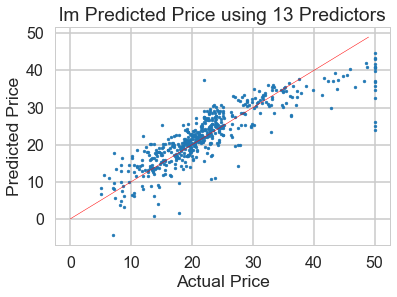

In [41]:
### Part 3 Checkup Exercise Set III - scatter plot predicted vs actual price.
plt.clf()
plt.scatter(x=bos.PRICE, y=p_vector, s=8)
x = np.arange(50); y = x.copy()
plt.plot(x, y, color='red', linewidth=0.5)
plt.title('lm Predicted Price using 13 Predictors')
plt.xlabel('Actual Price' )
plt.ylabel('Predicted Price')
plt.show()

In [42]:
# okay, here's the rSquared  
lm.score(X, bos.PRICE)

0.7406077428649428

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://online.stat.psu.edu/~ajw13/stat501/SpecialTopics/Reg_thru_origin.pdf).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [43]:
# Q1 answer
# set fit_intercept = False.
# What the intercept means is the average value of data where all the
# predictors are 0; that doesn't make sense in this context.

# Q2 answer
# I don't know how to answer this question.  I would guess that residuals being normally distributed would imply that they
# are uncorrelated.  I think this is more important than their distribution, but I can't say why.  As to the identical 
# distribution, that sounds incredibly tedious to verify (impractical?).

# Q3 answer
# False.  I don't see any you could not use LR on any distribution whatsoever.  
# LR's predictive value # is strictly dependent on how near to a linear function Y is.


### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [44]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.491103280363404


In [45]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [46]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [47]:
# first five predicted prices
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>
</div>

#### Part 3 Checkup Exercise Set III answer - discussion

This looks like a nearly normal distribution with a positive bias (more data points to the right of the maximum).  
The mean and median price is around 22k.  50% of the houses are between 17k and 27k.  There is one negative prediction.  
Since we're looking at predictions, that means it comes out of the model.  It might be useful to see which predictor(s) are driving that prediction.  It may be the case that we should adjust the model to degrade more usefully away from the median.


(array([  1.,   0.,   0.,   2.,   2.,   2.,   7.,   7.,   7.,  11.,  19.,
         26.,  28.,  43.,  45.,  49.,  44.,  43.,  30.,  23.,  23.,  23.,
         19.,  16.,  13.,   9.,   3.,   6.,   2.,   3.]),
 array([ -4.28300934,  -2.65112906,  -1.01924877,   0.61263152,
          2.2445118 ,   3.87639209,   5.50827237,   7.14015266,
          8.77203294,  10.40391323,  12.03579351,  13.6676738 ,
         15.29955409,  16.93143437,  18.56331466,  20.19519494,
         21.82707523,  23.45895551,  25.0908358 ,  26.72271609,
         28.35459637,  29.98647666,  31.61835694,  33.25023723,
         34.88211751,  36.5139978 ,  38.14587809,  39.77775837,
         41.40963866,  43.04151894,  44.67339923]),
 <a list of 30 Patch objects>)

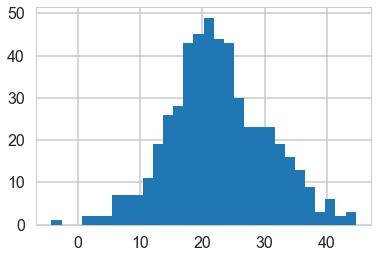

In [48]:
### Part 3 Checkup Exercise Set III answer: HISTOGRAM
lModel = lm.predict(X)
plt.hist(lModel, bins=30)

In [49]:
# I'm pretty sure there's a way to do this without coercing to DF but time is tight.
# This is the quickest way to get summary stats that comes to mind.
lModDF = pd.DataFrame(lModel); lModDF.describe()

,0
count,506.000000
mean,22.532806
std,7.914896
min,-4.283009
25%,17.447270
50%,22.120625
75%,27.412587
max,44.673399


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3><p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p></p>
</div>

** I did this above.  This model seems stronger than the one we built before.  **

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

### Part 3 Checkup Exercise Set III - answer

** There doesn't seem to be a big difference with this kind of fitting.  The syntax for model building in stats models is perhaps more natural.  In scikit-learn, it seems you can certainly build any model that statsmodels can build, but to do it, my understanding is that you need to build a dataframe that expresses your model by including the variables to be modeled while in statsmodels, the original data is unchanged, but models that combine fields (or do computation) can be built with an algebra-like syntax.  This may be handier for exploration.
The summary report in statsmodels is very useful.  I expect that scikit-learn can provide all the same information, but it might require a bit more effort.
**

In [50]:
# your turn


### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

__T__otal __S__um of __S__quares = __E__xplained __S__um of __S__quares + __R__esidual __S__um of __S__quares

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.  

* **     residual sum of squares = sum((y[i] - (betaZero + betaOne * x[i])^2) for i in range(0, n) **

* **  In english: RSS is the sum of the squared difference between actual data point and prediction for each (set of) predictor(s). **


$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [51]:
# RSS 
theRSS = round(np.sum((bos.PRICE - lm.predict(X)) ** 2), 2); theRSS

11080.28

#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

** In english: ESS is sum of difference between actual values and mean value for each data point **

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [52]:
# ESS 
theESS = round(np.sum( (lm.predict(X) - np.mean(bos.PRICE))** 2), 2); theESS

31636.02

### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

In [53]:
### calculate R^2.  The result confirms what I calculate below...
theRsquared = theESS/(theESS + theRSS); theRsquared

0.74060768371792496

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$


$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

</div>

#### Part 3 Checkup Exercise Set IV answer: interpretation (model below)

The intercept is 62.34.  This is the value if the pupil to teacher ratio is 0.  This has no meaning in this context.

There is only one coefficent: PTRATIO = -2.16.  This says if PTRATIO increases by 1, price will be reduced by \$2160 on average.  (95% probability between -2477 and -1837).

In [54]:
### Part 3 Checkup Exercise Set IV fit a model: answer 
mPTR = ols('PRICE ~ PTRATIO',bos).fit()
print(mPTR.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Fri, 01 Dec 2017   Prob (F-statistic):           1.61e-34
Time:                        22:53:52   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

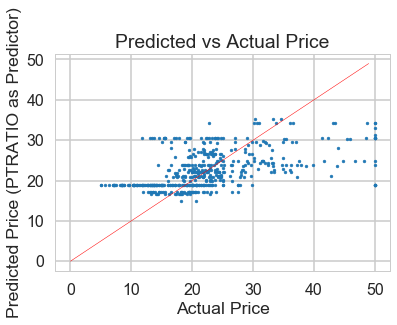

In [55]:
plt.clf()
plt.scatter(x=bos.PRICE, y=mPTR.fittedvalues, s=8)
x = np.arange(50); y = x.copy()
plt.plot(x, y, color='red', linewidth=0.5)
plt.title('Predicted vs Actual Price')
plt.xlabel('Actual Price' )
plt.ylabel('Predicted Price (PTRATIO as Predictor)')
plt.show()

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>
</div>

#### Answer:  $R^2$ 
 R-squared is 0.258 (from mPTR.summary() above).  This says that about 26% of the variance of price can be attributed to the predictor (PTRATIO).

In [56]:
# now check it by hand 
def myESS(model, actual):
    ''' model and actual are arrays '''
    return np.sum((model - np.mean(actual))** 2)
def myRSS(model, actual):
    return np.sum((model - actual)**2)
def myRsquared(model, actual):
    return myESS(model, actual)/(myESS(model, actual) + myRSS(model, actual))

myRsquared(mPTR.fittedvalues, bos.PRICE)

0.25784731800922267

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>
</div>

#### F Statistic

The F-statistic from this model is 175.1 (again from summary above).  This tells us that it's very likely that there is a relationship between the predictor and the response.  To state it another way, it says that it's very unlikely that the apparent relationship is a matter of chance.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

#### Part 3 Checkup Exercise Set IV answer: F-statistic and t-statistic 

** F-statistic: 175.1, t-statistic: -13.233 **

** $(-13.233)^2$ ~= 175.1  **

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Answer:  F-statistic: 244.2 >> 1; This tells us at least one of the predictors has a relationship with the price.  </b> </p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Answer:  R-squared: 0.593;  This tells us that approximately 60% of the variability in price is explained by the regression.</b></p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>

<p><b>Answer:  It is not so easy to tell what the significant variables are in this regression.  It's easier to describe what the coefficients signify.
</b></p>
<p>
<ul>
    <li>
    CRIM: -0.202; This suggests that for a one unit increase in per capita crime rate, price will fall about \$200 
    (I'm assuming price is denominated in units of \$1000).
    </li>
    <li> 
     RM: 7.38; This suggests that if the number of rooms is increased by 1, the price will increase around \$7400
     (between \$6600 and \$8200).
    </li>
    <li>
    PTRATIO:  -1.0742; This suggests that if the Pupil/Teacher Ratio is increased by 1, the price will fall around \$1000
    </li>
</ul>
</p>
</div>

In [57]:
# Part 3 checkup set V
# fit a model to 3 predictors
mCRP = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
print(mCRP.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Fri, 01 Dec 2017   Prob (F-statistic):           1.09e-97
Time:                        22:53:52   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

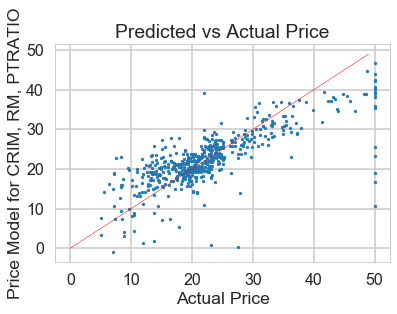

In [58]:
# now plot 
plt.clf()
plt.scatter(x=bos.PRICE, y=mCRP.fittedvalues, s=8)
x = np.arange(50); y = x.copy()
plt.plot(x, y, color='red', linewidth=0.5)
plt.title('Predicted vs Actual Price')
plt.xlabel('Actual Price' )
plt.ylabel('Price Model for CRIM, RM, PTRATIO')
plt.show()